In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns 


## data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Datasets/flowers/training_dataset'

types_ofFlowers = os.listdir(data_path)
print('Types of Flowers : ' , types_ofFlowers )
print(len(types_ofFlowers))

Types of Flowers :  ['rose', 'sunflower', 'daisy', 'tulip', 'dandelion']
5


In [ ]:
flowers = []

for item in types_ofFlowers : 
  all_flowers= os.listdir ( os.path.join(data_path , item ) )
  for flower in all_flowers:
    flowers.append(( item  , os.path.join( os.path.join(data_path , item ) , flower ) ))  

In [ ]:
len(flowers)

3337

In [ ]:
# dataframe 
df = pd.DataFrame(flowers , columns=['flower_type' , 'flower_path'])
df.head()

,flower_type,flower_path
0,rose,/content/drive/MyDrive/Datasets/flowers/traini...
1,rose,/content/drive/MyDrive/Datasets/flowers/traini...
2,rose,/content/drive/MyDrive/Datasets/flowers/traini...
3,rose,/content/drive/MyDrive/Datasets/flowers/traini...
4,rose,/content/drive/MyDrive/Datasets/flowers/traini...


In [ ]:
# total Number of rooms in dataset 
df.shape[0]

3337

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


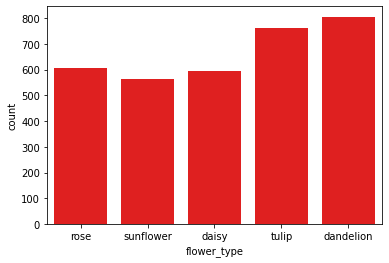

In [ ]:
# values counts 
sns.countplot(df['flower_type'] , color='r')

In [ ]:
for i in df['flower_type'].unique():
  print(i)

rose
sunflower
daisy
tulip
dandelion


In [ ]:
from PIL import Image

In [ ]:
#import cv2 
path = data_path 

im_size = 224 

images = []
labels = []

for i in df['flower_type'].unique():
  dir = os.path.join(path , i )
  file_names = [x for x in os.listdir(dir)]
  for f in file_names:
    print(f)
    img = Image.open( os.path.join(dir , f ) ) 
    img = np.asarray(img.resize( (im_size , im_size )))
    print(img)
    images.append(img)
    labels.append(i)



[[[209 196 224]
  [197 184 212]
  [187 174 200]
  ...
  [169 163 153]
  [170 161 152]
  [171 161 152]]

 [[224 211 238]
  [213 199 227]
  [203 189 215]
  ...
  [167 163 153]
  [169 162 152]
  [171 161 152]]

 [[232 220 245]
  [223 209 238]
  [214 199 227]
  ...
  [166 164 153]
  [168 163 152]
  [169 162 152]]

 ...

 [[222 184 231]
  [219 183 231]
  [224 193 237]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[203 158 215]
  [209 169 223]
  [224 193 238]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[186 141 201]
  [204 163 220]
  [230 199 245]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
33874126263_3f6f965784_n.jpg
[[[105 123   1]
  [108 128   5]
  [104 128   4]
  ...
  [ 54  90   1]
  [ 65  97   0]
  [ 78 110   4]]

 [[ 98 114   4]
  [ 99 117   4]
  [ 93 115   1]
  ...
  [ 57  93   0]
  [ 70 103   1]
  [ 81 113   5]]

 [[ 92 107   7]
  [ 90 107   6]
  [ 82 103   2]
  ...
  [ 62  98   0]
  [ 77 111   3]
  [ 84 116   3]]

 ...

 [[ 14  13   3]
  [  6 

In [ ]:
np.asarray(images[0]).shape

In [ ]:
len(images) == len(labels)

In [ ]:
# transform image arrayto np.array
images  = np.array(images)
images.shape

In [ ]:
len(labels)

In [ ]:
images = images.astype('float32') / 255.0

**labeling/one hot encoding op variables**


In [ ]:
from sklearn.preprocessing import LabelEncoder 

#print(y[:5])

# for y
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform (labels)
#print ((y))
y = y.reshape(-1,1)

In [ ]:
from keras.utils import np_utils
num_classes = df.flower_type.nunique() # PUT HERE HOW MANY CLASSES YOU HAVE 

Y = np_utils.to_categorical(y, num_classes)
Y

In [ ]:
# onehot Encodings 
# warm up
##dy = pd.DataFrame(y)
#dy.head()
#a = pd.get_dummies(dy[0])



In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images , Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.10, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D , Dropout
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.initializers import glorot_uniform
from matplotlib.pyplot import imshow

In [ ]:
# x is input, y=F(x)
# identity block simply means input should be equal to output. 
#  y = x + F(x)   the layers in a traditional network are learning the true output H(x)
# F(x) = y - x   the layers in a residual network are learning the residual F(x)
# Hence, the name: Residual Block.



def identity_block(X, f, filters, stage, block):
    """
   
    Arguments:
    X -- input of shape (m, height, width, channel)
    f -- shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Saving the input value.we need this later to add to the output. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    #X = Dropout(0.2)(X)
    X = Activation('relu')(X)
    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    #X = Dropout(0.2)(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    #X = Dropout(0.2)(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X) # 1,1 is filter size
    #X = Dropout(0.3)(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)  # normalization on channels
    
    X = Activation('relu')(X)

      
    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Dropout(0.3)(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    #X = Dropout(0.3)(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    


    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    #X_shortcut = Dropout()(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
#Each ResNet block is either 2 layer deep
def ResNet50(input_shape=(224, 224, 3), classes=5):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X) #64 filters of 7*7 
    X = BatchNormalization(axis=3, name='bn_conv1')(X) #batchnorm applied on channels
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) #window size is 3*3

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    # convolutional_block is a function defined above. Convolutional_block have 3 layers.
    #filters=[64, 64, 256] first 64 is for 1st layer and 2nd 64 is for 2nd layer and 256 is for 3rd layer of convultional block   
    # below are the conv layers from convolutional_block function
    #X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
   
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b') 
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
  
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)


    ### START CODE HERE ###

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL 
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (224, 224, 3), classes = 5)
model.summary()

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint  , EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=np.sqrt(0.1) , patience=5 , min_lr = 0.5e-6)
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
early_stop = EarlyStopping( patience = 70 , verbose = 1 , mode = 'auto')

In [ ]:
model

In [ ]:
epochs = 20
batch_size = 10

model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy']  )

hist = model.fit(train_x, train_y , batch_size=batch_size, validation_data=(test_x ,test_y),
epochs=epochs, callbacks=[reduce_lr , checkpointer ,early_stop ])

Epoch 1/200
294/294 [==============================] - 2307s 8s/step - loss: 2.8148 - accuracy: 0.3617 - val_loss: 2.4047 - val_accuracy: 0.2178

Epoch 00001: val_loss improved from inf to 2.40472, saving model to model.weights.best.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/200
167/294 [================>.............] - ETA: 16:17 - loss: 1.3934 - accuracy: 0.4419

In [18]:
import seaborn as sns 



In [12]:
a = ['a' , 'b' , 'c' , 'd']
b  =[10,20,40,80]

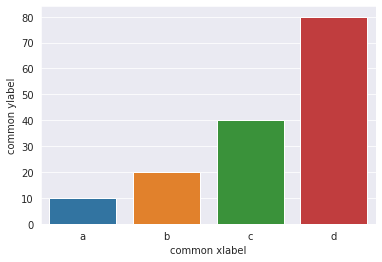

In [19]:
ax= sns.barplot(x=a ,y = b ,)
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

In [21]:
ax.figure.savefig("output.png")

Text(0.5, 1.0, 'Colors vs Values')

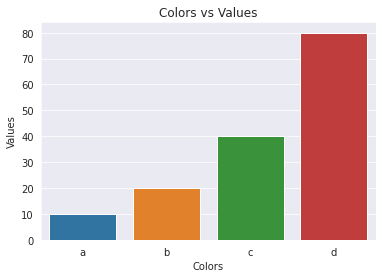

In [26]:
ax1= sns.barplot(x=a ,y = b )
plt.xlabel("Colors")
plt.ylabel("Values")
plt.title("Colors vs Values")

In [27]:
ax1.figure.savefig("output2.png")

<BarContainer object of 4 artists>

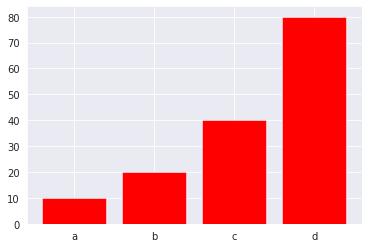

In [34]:
plt.bar(a , b ,color='r' , linewidth=0.5)